In [8]:
# Imports - exercise 4b
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import gaussian
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian

In [6]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

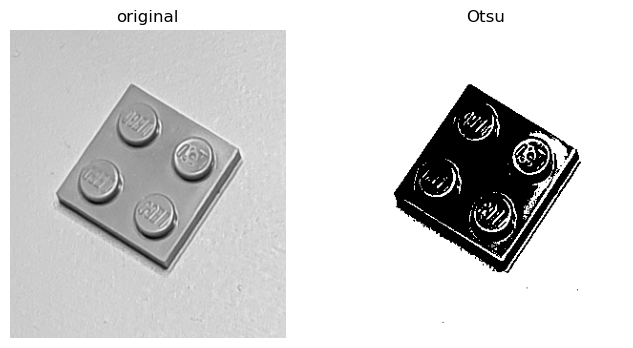

In [11]:
# Read in an image
in_dir = "./data/"
im_name = "lego_5.png"

lego_img = io.imread(in_dir + im_name, as_gray=True)

threshold = threshold_otsu(lego_img)
bin_img = (lego_img > threshold)*1

plot_comparison(lego_img, bin_img, "Otsu")

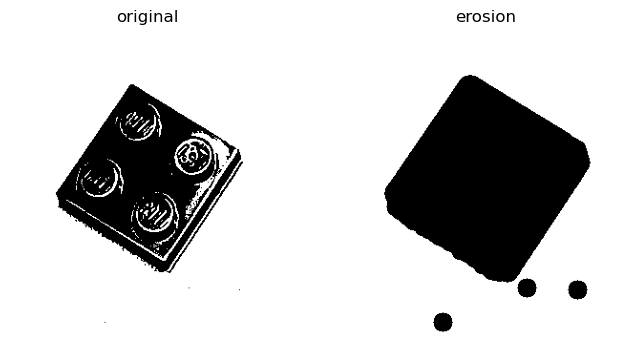

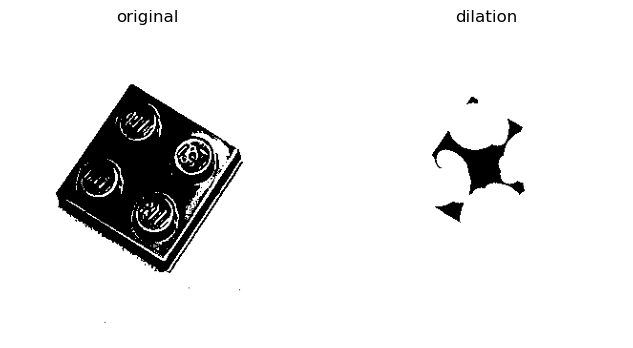

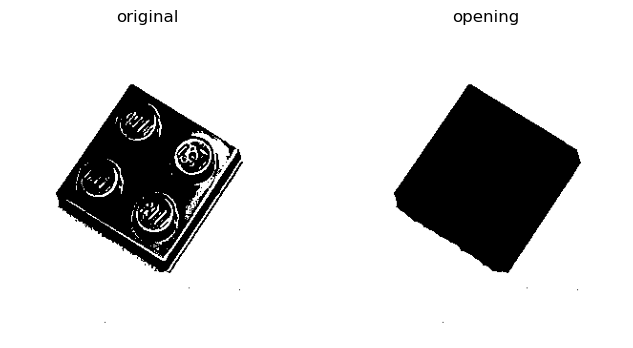

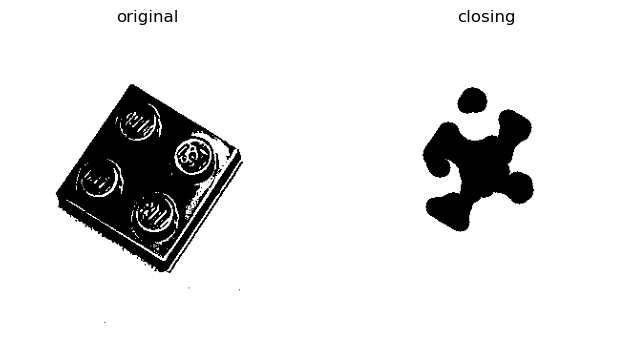

In [24]:
footprint = disk(10)

eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

# remove small object
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

# closes holes in objects
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

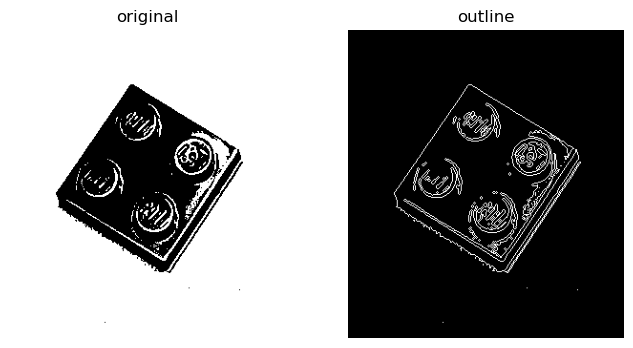

In [28]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'outline')

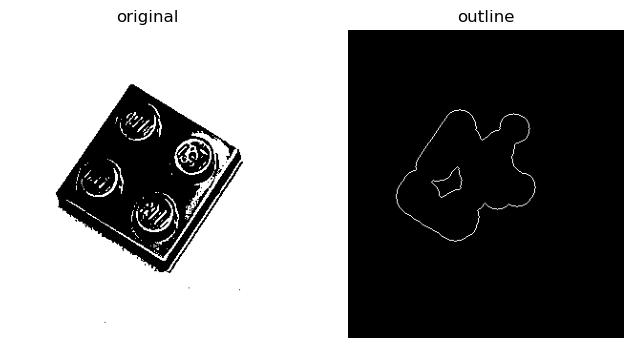

In [31]:
# remove small object
footprint = disk(1)
opened = opening(bin_img, footprint)

# closes holes in objects
footprint2 = disk(15)
closed = closing(opened, footprint2)

outline = compute_outline(closed)



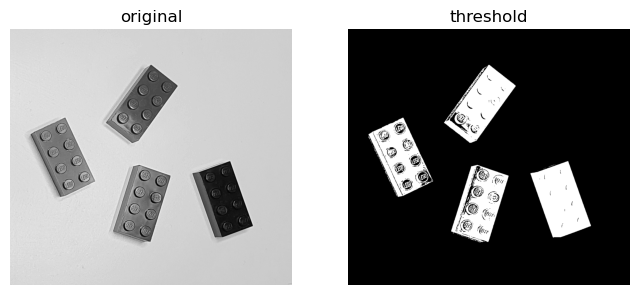

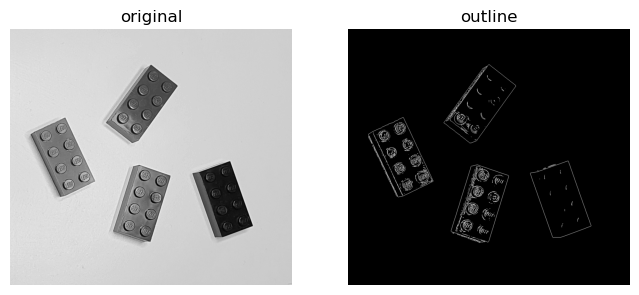

In [60]:
# Read in an image
in_dir = "./data/"
im_name = "lego_7.png"

lego_7_img = io.imread(in_dir + im_name, as_gray=True)

threshold = threshold_otsu(lego_7_img)
thres_img = lego_7_img < threshold
plot_comparison(lego_7_img, thres_img, 'threshold')


outline = compute_outline(thres_img)
plot_comparison(lego_7_img, outline, 'outline')


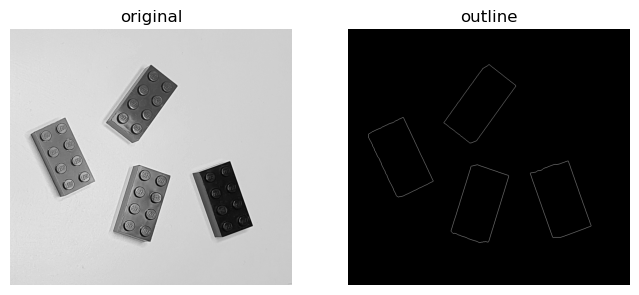

In [62]:
threshold = threshold_otsu(lego_7_img)
thres_img = lego_7_img < threshold

# # remove small object
# footprint = disk(10)
# opened = opening(thres_img, footprint)

# closes holes in objects
footprint2 = disk(16)
closed = closing(thres_img, footprint2)

outline = compute_outline(closed)

plot_comparison(lego_7_img, outline, 'outline')

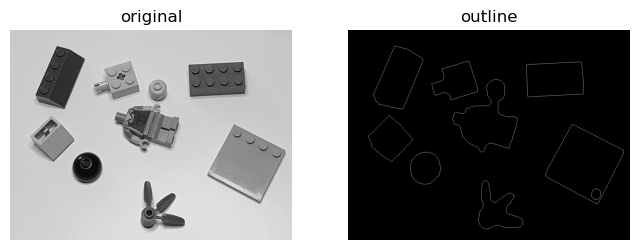

In [70]:
# Read in an image
in_dir = "./data/"
im_name = "lego_3.png"

lego_3_img = io.imread(in_dir + im_name, as_gray=True)

outline = compute_outline(thres_img)

threshold = threshold_otsu(lego_3_img)
thres_img = lego_3_img < threshold


# closes holes in objects
footprint2 = disk(16)
closed = closing(thres_img, footprint2)

outline = compute_outline(closed)

plot_comparison(lego_3_img, outline, 'outline')

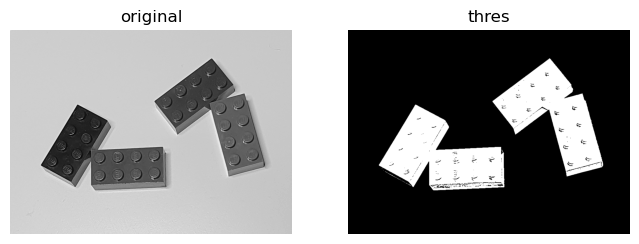

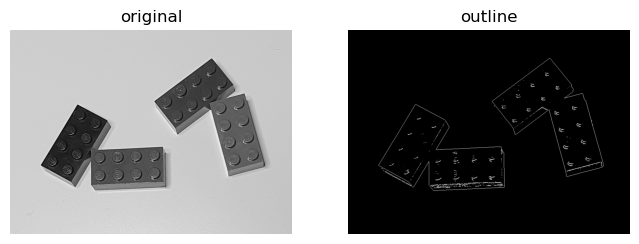

In [78]:
# Read in an image
in_dir = "./data/"
im_name = "lego_9.png"

lego_9_img = io.imread(in_dir + im_name, as_gray=True)

thres = threshold_otsu(lego_9_img)
bin_img = lego_9_img < thres

plot_comparison(lego_9_img, bin_img, "thres")

outline = compute_outline(bin_img)

plot_comparison(lego_9_img, outline, "outline")


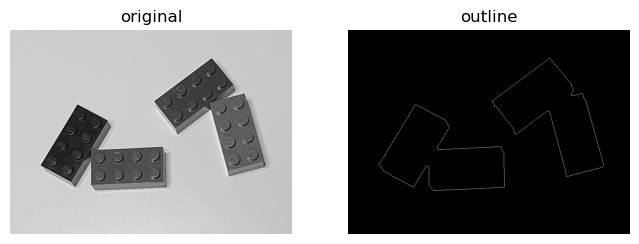

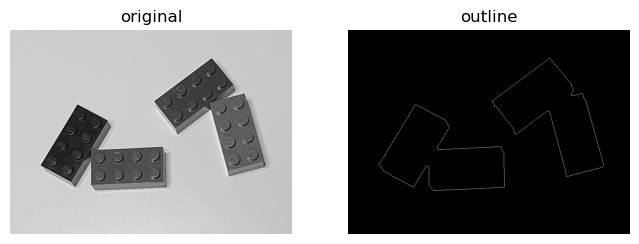

In [99]:

footprint2 = disk(6)
closed = closing(bin_img, footprint2)

outline = compute_outline(closed)

plot_comparison(lego_9_img, outline, "outline")

footprint = disk(50)
eroted = erosion(closed, footprint)


plot_comparison(lego_9_img, outline, "outline")


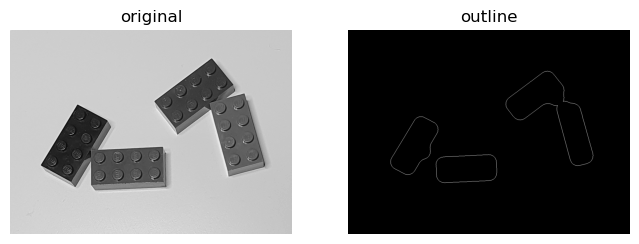

In [101]:
footprint = disk(25)
dilated = dilation(eroted, footprint)
outline = compute_outline(dilated)

plot_comparison(lego_9_img, outline, "outline")

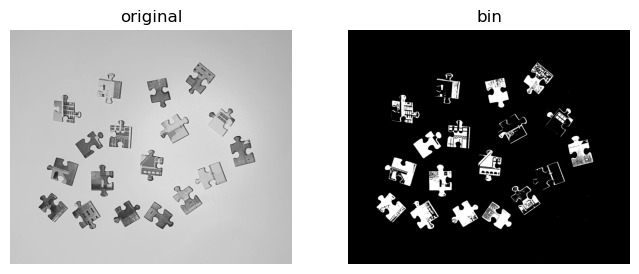

In [105]:
# Read in an image
in_dir = "./data/"
im_name = "puzzle_pieces.png"

puzzle_img = io.imread(in_dir + im_name, as_gray=True)

thres = threshold_otsu(puzzle_img)
bin_img = puzzle_img < thres

plot_comparison(puzzle_img, bin_img, "bin")

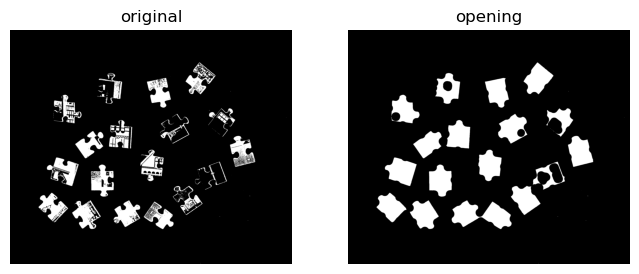

In [117]:
footprint = disk(30)
opened = closing(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

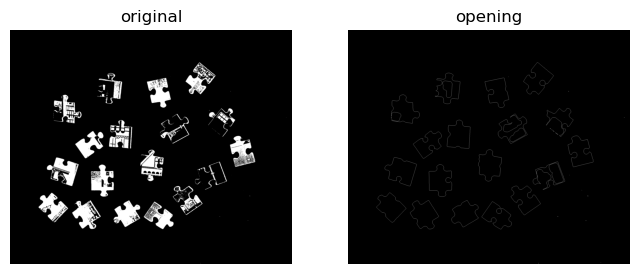

In [116]:
outline = compute_outline(opened)
plot_comparison(bin_img, outline, 'opening')